# Datacheck for OpSim 

## About

Inspect input data meant for the Simulator object. The "orbitals" data is stored and read in the HDF5 format and includes time axis in MJD, as well as the sun (alt, az) and the satellites.

In [1]:
# Jupyter magic for autoreload:
%reload_ext autoreload
%autoreload 2

# Standard imports and utility ---
import os
import sys

import numpy as np
import h5py

import yaml
import matplotlib.pyplot as plt
import simpy

from   dateutil     import parser
from   astropy.time import Time

print("---------------------------------- PATH ----------------------------------------")
for path_part in sys.path:
    if path_part!='': print(f'''{path_part}''')


# ---
import lusee        # Core lusee software
import nav          # Astro/observation wrapper classes
from   nav import *

import sim          # Simulation handler
import hardware     # hardware modules

print('--------------------------------- VERSIONS -------------------------------------')
print(f'''simpy: {simpy.__version__}, lusee: {lusee.__version__}, sim: {sim.__version__}''')

---------------------------------- PATH ----------------------------------------
/home/maxim/projects/lusee/opsim/notebooks
/home/maxim/projects/lusee/luseepy
/home/maxim/projects/lusee/opsim
/home/maxim/.virtualenvs/lusee/lib/python3.10/site-packages/backports
/usr/local/lib/python310.zip
/usr/local/lib/python3.10
/usr/local/lib/python3.10/lib-dynload
/home/maxim/.virtualenvs/lusee-simpy/lib/python3.10/site-packages
--------------------------------- VERSIONS -------------------------------------
simpy: 4.0.2, lusee: 1.2-dev, sim: 0.1


In [32]:
# prefab_file = "../data/20250204-20250807.hdf5"
prefab_file = "../foo.hdf5"
f = h5py.File(prefab_file, "r")

ds_meta = f["/meta/configuration"] # Expect YAML payload
conf    = yaml.safe_load(ds_meta[0,])
metadata= yaml.dump(conf)

print('-----------------------------------------------')
print(f'''*** Metadata in the file {prefab_file} ***''')
print('-----------------------------------------------')
print(metadata)

print('------------------------- TIME ENDPOINTS -----------------------------------')
prd = conf['period'] # we use the dateutil parser to convert from text to datetime
t_start = Time(val=parser.parse(prd['start']),  format='datetime')
t_end   = Time(val=parser.parse(prd['end']),    format='datetime')
print(t_start.mjd, t_end.mjd)
print('----------------------------------------------------------------------------')

### -- Now on to the payload, the "orbitals"
ds_data = f["/data/orbitals"]
da = np.array(ds_data[:]) # data arrat
print(f'''Shape of the data payload: {da.shape}''')

print('-----------------------------------------------')
print(f'''*** Data payload in the file {prefab_file} ***''')
print('-----------------------------------------------')
print(f'''Shape of the data payload: {da.shape}''')

# Print slices if necessary: # print(data_array[0:3,1:2]) # print(data_array[:,1:2])

print(da[0:3,:])

-----------------------------------------------
*** Metadata in the file ../foo.hdf5 ***
-----------------------------------------------
location:
  height: 0
  latitude: -23.814
  longitude: 182.258
period:
  deltaT: 900
  end: '2027-01-15 02:00:00'
  start: '2026-01-10 20:00:00'
satellites:
  bge:
    aposelene_ref_time: '2024-05-01T00:00:00'
    argument_of_pericenter_deg: 252.625
    eccentricity: 0.56489
    inclination_deg: 57.097
    raan_deg: 0
    semi_major_km: 5738
  lpf:
    aposelene_ref_time: '2024-05-01T00:00:00'
    argument_of_pericenter_deg: 72.625
    eccentricity: 0.56489
    inclination_deg: 57.097
    raan_deg: 0
    semi_major_km: 5738

------------------------- TIME ENDPOINTS -----------------------------------
61050.833333333336 61420.083333333336
----------------------------------------------------------------------------
Shape of the data payload: (35450, 7)
-----------------------------------------------
*** Data payload in the file ../foo.hdf5 ***
---------

In [33]:
mySun = Sun(da[:,0], da[:,1] , da[:,2])
mySat = Sat(da[:,0], da[:,3] , da[:,4])

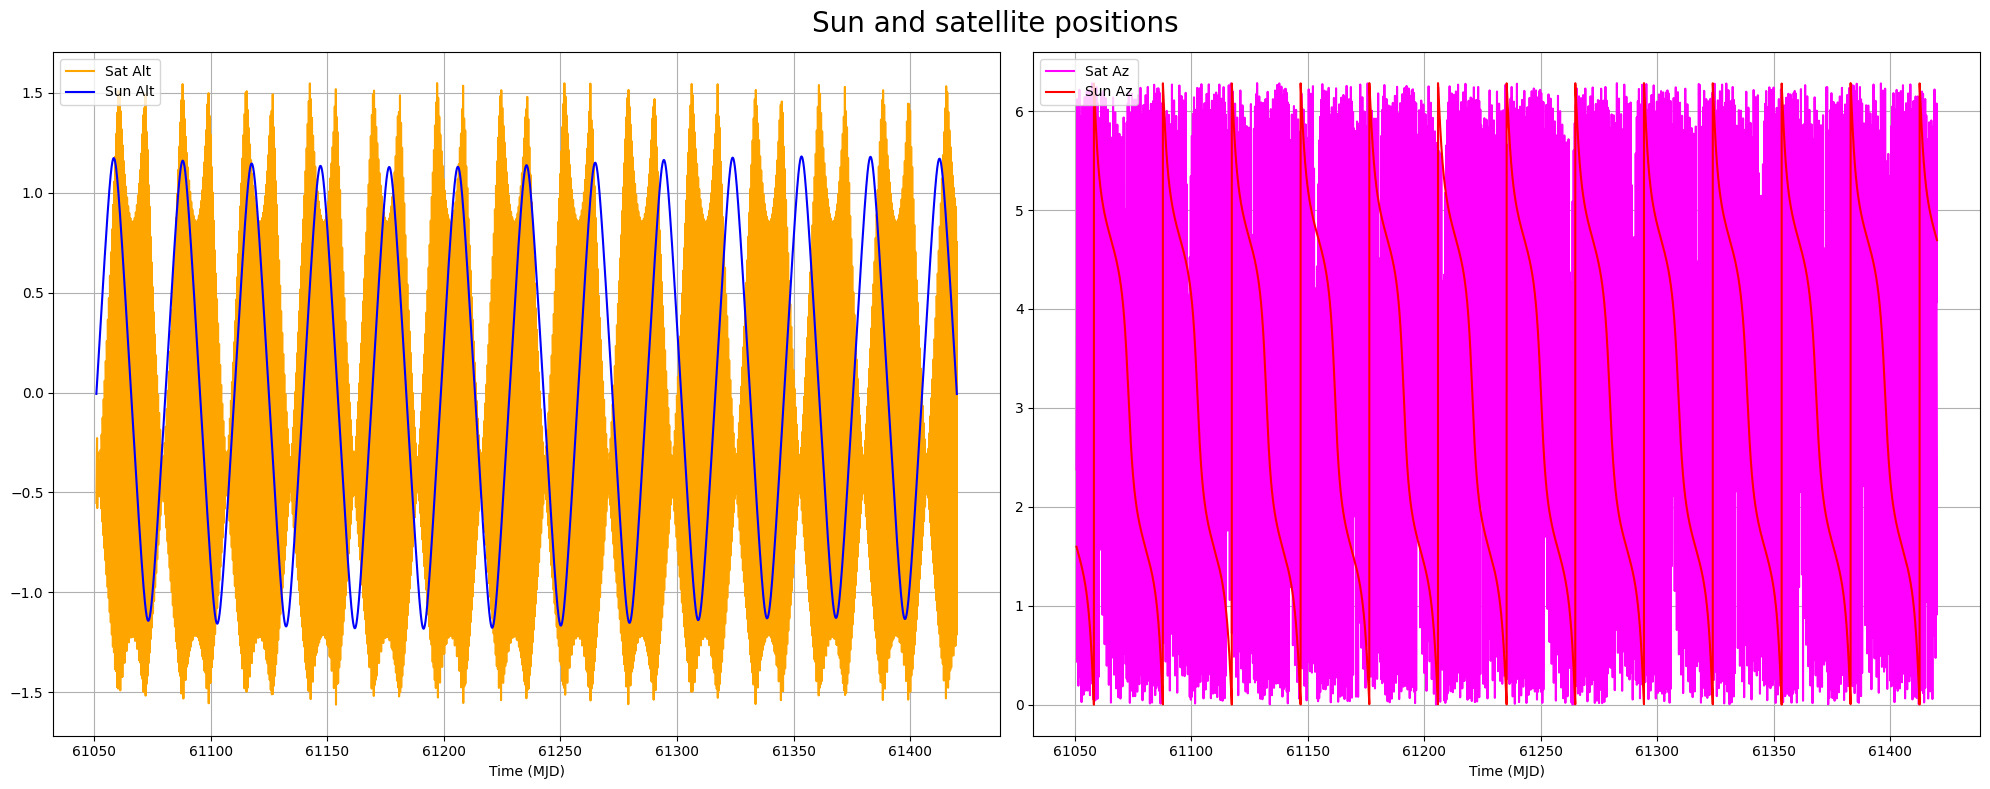

In [34]:
fig, (p1, p2) = plt.subplots(1,2)
fig.suptitle('Sun and satellite positions', fontsize=20)
plt.rcParams["figure.figsize"] = [20., 8.]
plt.rcParams["figure.autolayout"] = True


p1.set_xlabel('Time (MJD)')
p2.set_xlabel('Time (MJD)')

p1.plot(mySat.mjd, mySat.alt,  color="orange", label="Sat Alt")
p1.plot(mySun.mjd, mySun.alt,  color="blue",   label="Sun Alt")

p2.plot(mySat.mjd, mySat.az, color="magenta",label="Sat Az")
p2.plot(mySun.mjd, mySun.az, color="red",    label="Sun Az")


p1.grid(True)
_ = p1.legend()

p2.grid(True)
_ = p2.legend()


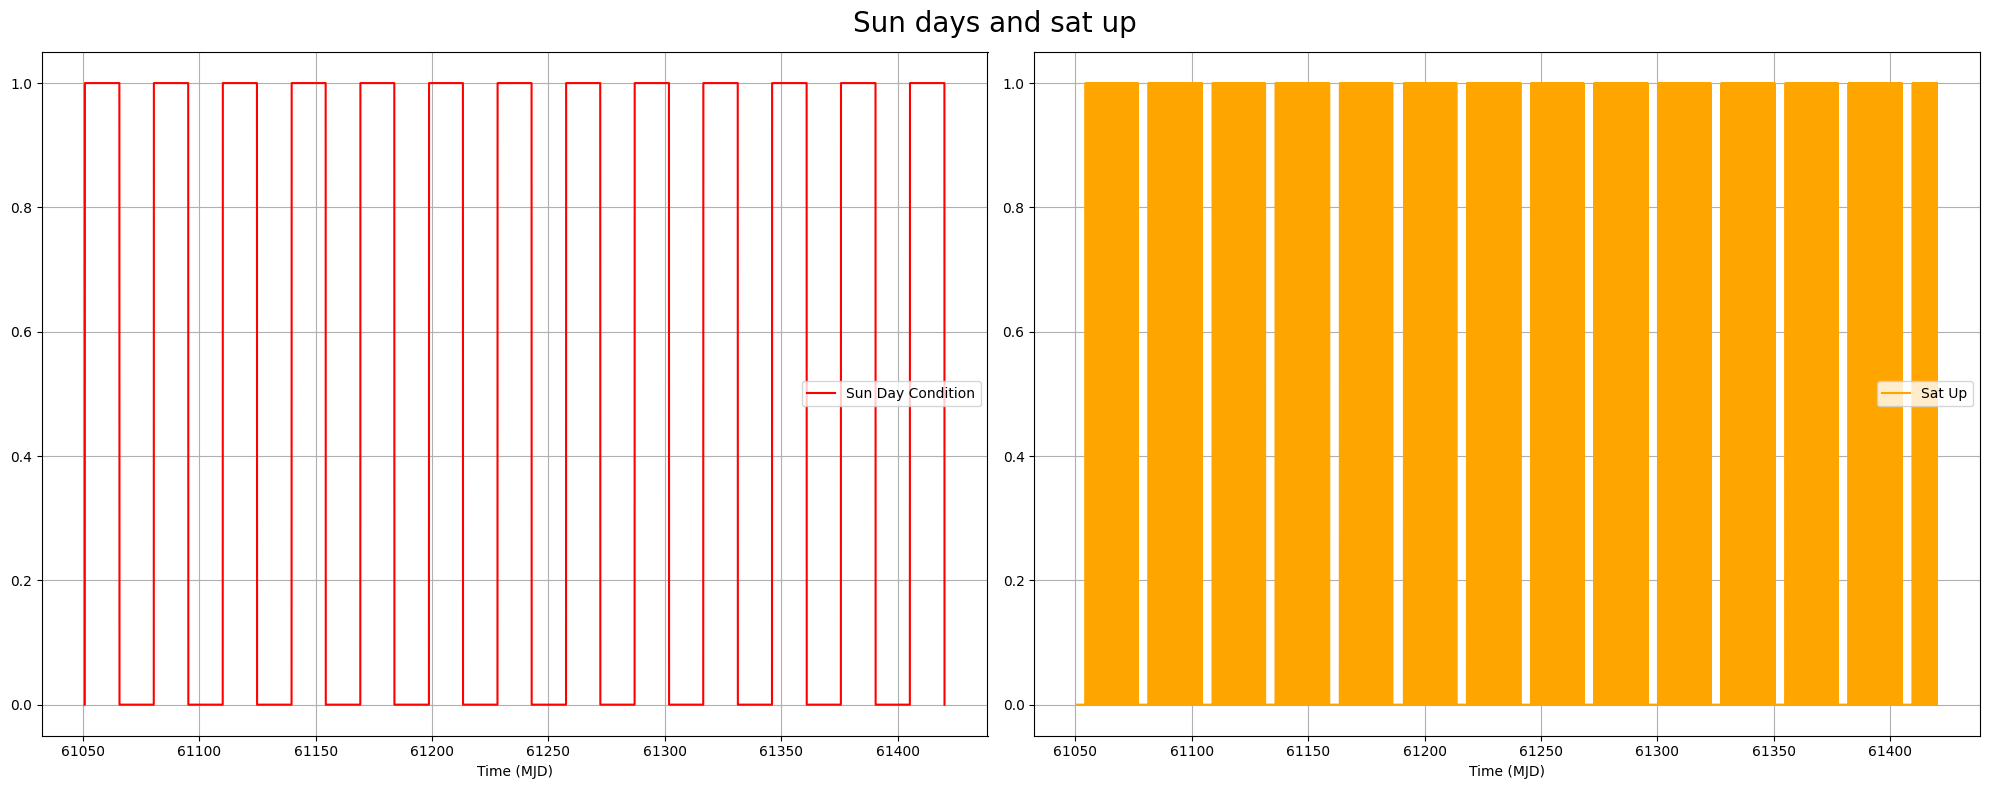

In [35]:
fig, (p1, p2) = plt.subplots(1,2)
fig.suptitle('Sun days and sat up', fontsize=20)
plt.rcParams["figure.figsize"] = [20., 8.]
plt.rcParams["figure.autolayout"] = True


p1.set_xlabel('Time (MJD)')
p2.set_xlabel('Time (MJD)')

p1.plot(mySun.mjd, mySun.day, color="red",    label="Sun Day Condition")
p2.plot(mySat.mjd, mySat.up,  color="orange", label="Sat Up")


p1.grid(True)
_ = p1.legend()

p2.grid(True)
_ = p2.legend()
plt.show()

In [37]:
print(len(mySun.mjd))
for crs in mySun.crossings:
    print(crs, '\t', mySun.mjd[crs])

print(mySun.day[-1])


35450
3 	 61050.864583333336
1429 	 61065.71875
2847 	 61080.489583333336
4267 	 61095.28125
5690 	 61110.104166666664
7102 	 61124.8125
8528 	 61139.666666666664
9934 	 61154.3125
11362 	 61169.1875
12764 	 61183.791666666664
14192 	 61198.666666666664
15593 	 61213.260416666664
17018 	 61228.10416666667
18423 	 61242.739583333336
19844 	 61257.54166666667
21254 	 61272.22916666667
22671 	 61286.989583333336
24088 	 61301.75
25501 	 61316.46875
26924 	 61331.29166666667
28336 	 61346.0
29764 	 61360.875
31176 	 61375.583333333336
32604 	 61390.458333333336
34020 	 61405.208333333336
35445 	 61420.052083333336
False
